In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
ng =pd.read_csv('cleaned_dataset.csv')

#Display the first five rows of the dataset
print(ng.head().to_string)

<bound method DataFrame.to_string of     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1  37.0  1.0  2.0     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2  41.0  0.0  1.0     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3  56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0     1.0  
1    0.0  0.0   2.0     1.0  
2    2.0  0.0   2.0     1.0  
3    2.0  0.0   2.0     1.0  
4    2.0  0.0   2.0     1.0  >


In [23]:
#Data spliting
#split the data into training (80%) and testing (20%) data

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#cross validation- evaluate performance of the data
from sklearn.model_selection import StratifiedKFold, cross_val_score
model=RandomForestClassifier()
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(model, x, y, cv=cv, scoring='accuracy')

print('Cross validation accuracy:', scores.mean())
print(f'Mean cross validation score: {scores.mean():.3f} +/-{scores.std():.3f}')

#Define function to perform cross validation and evaluate the models
#Def evaluate_model(model, x_train, y_train, x_test, y_test)
#Perform five fold cross validation
# cv=StratifieldKFold(n_splits=5, shuffle+true, random state=42

Cross validation accuracy: 0.6533333333333334
Mean cross validation score: 0.653 +/-0.061


In [18]:
#Training and evaluating
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Test score accuracy', accuracy_score(y_test,y_pred))

Test score accuracy 0.5901639344262295


In [19]:
#Classification accuracy of the algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#initialize the models
models={
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random forest':RandomForestClassifier(random_state=42),
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(probability=True, random_state=42) #To produce same randm split of 42

    
}

In [20]:
#Evaluate the metrics
from sklearn.metrics import roc_auc_score


metrics={
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1_score':f1_score,
    'ROC AUC':roc_auc_score
}

Logistic Regression, Accuracy:0.7540983606557377
Logistic Regression, Precision:0.7428571428571429
Logistic Regression, Recall:0.8125
Logistic Regression, F1_score:0.7761194029850746
Logistic Regression, ROC AUC:0.7510775862068966


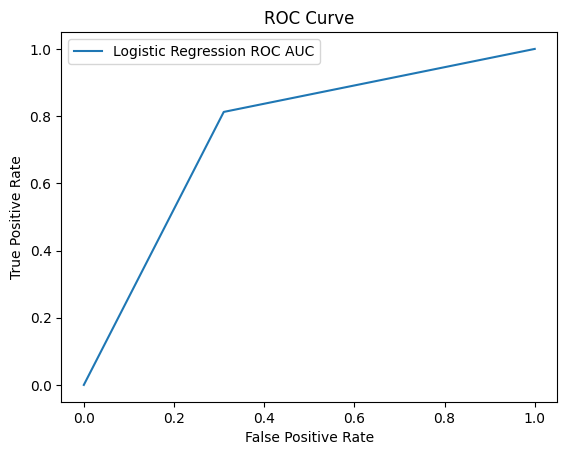

Decision Tree, Accuracy:0.5573770491803278
Decision Tree, Precision:0.5757575757575758
Decision Tree, Recall:0.59375
Decision Tree, F1_score:0.5846153846153846
Decision Tree, ROC AUC:0.5554956896551724


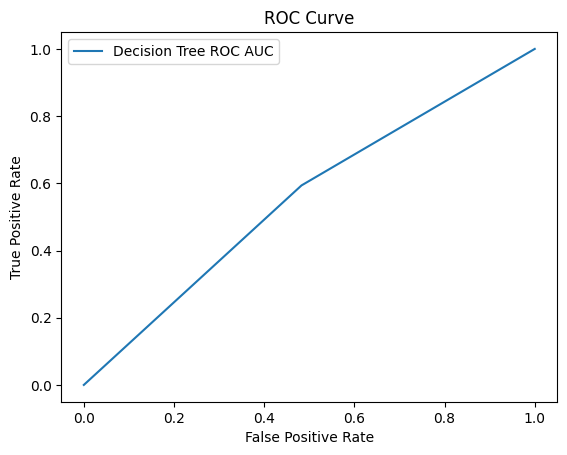

Random forest, Accuracy:0.5901639344262295
Random forest, Precision:0.6206896551724138
Random forest, Recall:0.5625
Random forest, F1_score:0.5901639344262295
Random forest, ROC AUC:0.5915948275862069


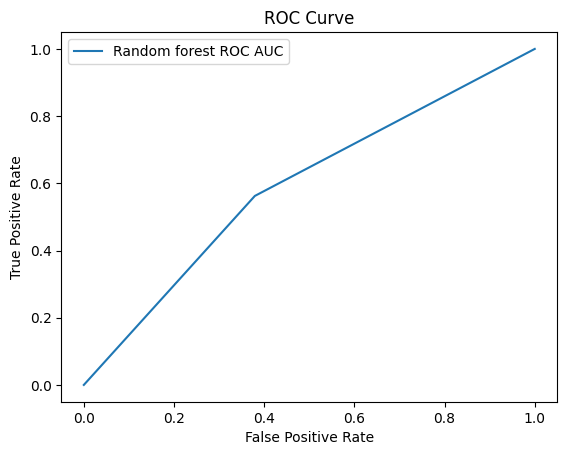

KNN, Accuracy:0.639344262295082
KNN, Precision:0.6785714285714286
KNN, Recall:0.59375
KNN, F1_score:0.6333333333333333
KNN, ROC AUC:0.6417025862068966


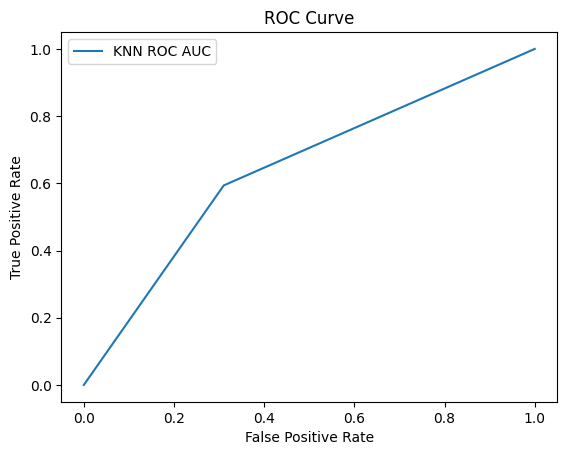

SVM, Accuracy:0.7049180327868853
SVM, Precision:0.675
SVM, Recall:0.84375
SVM, F1_score:0.75
SVM, ROC AUC:0.6977370689655172


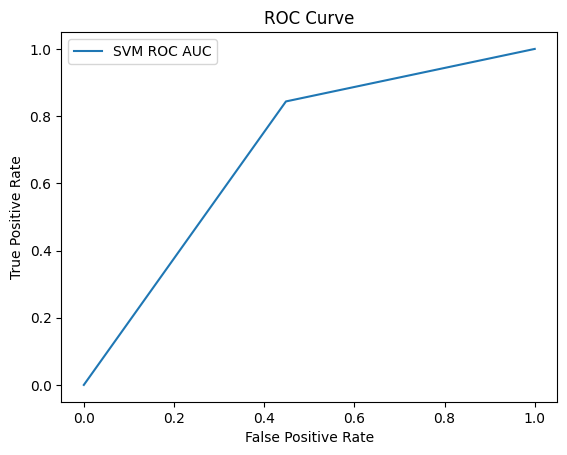

In [24]:
#Train and evaluate each model
from sklearn.metrics import roc_curve


for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred=model.predict(X_test)

    #calculate metrics
    for metric_name, metric_func in metrics.items():
        metric_value=metric_func(y_test, y_pred)
        print(f'{model_name}, {metric_name}:{metric_value}')

        if metric_name=='ROC AUC':
            fpr, tpr,_=roc_curve(y_test, y_pred)
            plt.plot(fpr, tpr,label=f'{model_name} ROC AUC')

            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()
            plt.show()


In [ ]:
#Actionable insight of the moodels
#Best performed model: Logistic Regression.Logistic Regression, Accuracy:0.7540983606557377
# Precision:0.7428571428571429, Recall:0.8125, F1_score:0.7761194029850746, ROC AUC:0.7510775862068966

#Balance model performance

#KNN
    #KAccuracy:0.639344262295082, Precision:0.6785714285714286, Recall:0.59375,
    #F1_score:0.633333333333333, ROC AUC:0.6417025862068966

#SVM
    #Accuracy:0.7049180327868853, Precision:0.675, Recall:0.84375,
    #F1_score:0.75, ROC AUC:0.6977370689655172

#Decision Tree
   #Accuracy:0.5573770491803278, Precision:0.5757575757575758, Recall:0.59375, 
   # F1_score:0.5846153846153846, ROC AUC:0.5554956896551724 

#Random forest
    # Accuracy:0.5901639344262295, Precision:0.6206896551724138, Recall:0.5625,
    #  F1_score:0.5901639344262295, ROC AUC:0.5915948275862069


#  Recommendation

    #Decision tree: 
    # #Feature Engineering: Consider exploring additional features or transforming existing ones to improve model performance.
    #Model Tuning: Experiment with hyperparameter tuning to optimize your Decision Tree model further.
    #Ensemble Methods: Try ensemble methods like Random Forests or Gradient Boosting, which often perform better than single Decision Trees.
    #lass Imbalance Handling: If there is class imbalance, techniques like oversampling, undersampling, or using class weights may help improve performance.
    #Feature Importance: Analyze feature importance to understand which features are contributing the most to your model's predictions.

    #SVM:
    # Fine-tuning: SVM models can benefit from fine-tuning parameters such as the kernel type, regularization parameter (C), 
    # and gamma (for non-linear kernels like RBF).
    #Feature Scaling: Ensure features are scaled appropriately, 
    # especially for SVMs, which are sensitive to the scale of input features.
Cross-validation: Perform cross-validation to ensure the model's generalization performance and stability.
    #Class Imbalance Handling: Consider techniques such as class weights or
    # resampling methods to address any class imbalances in your dataset.

   #KNN:
   # Optimal K Selection: Experiment with different values of K
   #to find the optimal balance between bias and variance.
   #Feature Scaling: Ensure features are scaled appropriately, 
   #as KNN is sensitive to the scale of input features.
   #Distance Metric: Evaluate different distance metrics (
   #e.g., Euclidean, Manhattan) to determine which one best suits your data.
   #Cross-validation: Use cross-validation to assess the model's 
   #performance robustness and generalizeability.

   #Random forest:
   #Number of Trees: Experiment with increasing the number of trees (n_estimators) 
   #to potentially improve model performance.
   #Feature Importance: Analyze feature importance to understand which features are contributing 
   #the most to your model's predictions and consider feature selection or engineering based on these insights.
   #Hyperparameter Tuning: Fine-tune other hyperparameters such as max_depth, min_samples_split, 
   #and min_samples_leaf to optimize model performance.
   #Ensemble Methods: Consider using advanced ensemble techniques like Gradient Boosting or XGBoost, 
   #which often provide enhanced performance over Random Forests.

   #Models considered for deployment
   #SVM stands out for its high recall and overall balanced performance.
   #KNN and Random Forest also show reasonable performance metrics but may require further tuning or
   #consideration based on specific requirements (e.g., interpretability vs. predictive power).
  

#   Conclusion
#Logistic Regression is the best performer model with the highest score metrics

#My Decision Tree model shows moderate performance with respect to accuracy, precision, recall, F1-score, and ROC AUC.
#There is potential for improvement, 
# especially in enhancing the model's ability to distinguish between classes (as indicated by ROC AUC).
#Further experimentation with feature engineering, 
# model selection, and tuning could lead to better performance.
#It's crucial to consider the specific objectives of your application 
# (e.g., maximizing precision or recall depending on the use case) when interpreting these results and making improvements.

#My SVM model demonstrates good overall performance with respectable metrics
#across accuracy, precision, recall, F1-score, and ROC AUC.
#It performs particularly well in terms of recall, indicating it effectively identifies positive instances.
#There is potential for further improvement through parameter tuning 
#and possibly exploring different kernels or ensemble methods.

#My KNN model shows moderate performance across the metrics evaluated.
#It achieves decent accuracy and precision, but there is room for improvement in recall and overall F1-score.

#Your Random Forest model demonstrates moderate performance across the metrics evaluated.
#It achieves reasonable accuracy and precision, but there is room for improvement in recall and overall F1-score.
